In [39]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [40]:
root = zarr.open('trajectories.zarr', mode='r')


In [41]:
# Access the model_name dataset
model_names = root['model_name'] # ['model_name']
print(model_names[0])

['progress']


In [42]:
def get_change_indices(model_names):
    change_indices = []
    current_name = model_names[0]
    for idx, name in enumerate(model_names):
        if name != current_name:
            change_indices.append(idx)
            current_name = name
    return change_indices
change_indices = get_change_indices(model_names) + [len(model_names)]

In [44]:
print(change_indices)

[11966, 22095]


In [47]:
def plot_heatmap(start_idx, end_idx):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]

    # Create a 2D histogram (heatmap)
    plt.hist2d(x_data, y_data, bins=(100, 100), cmap=plt.cm.jet, range=[-0.3,0.3])
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Heatmap from index {start_idx} to {end_idx}')
    # plt size y from 0 to 0.4
    plt.show()


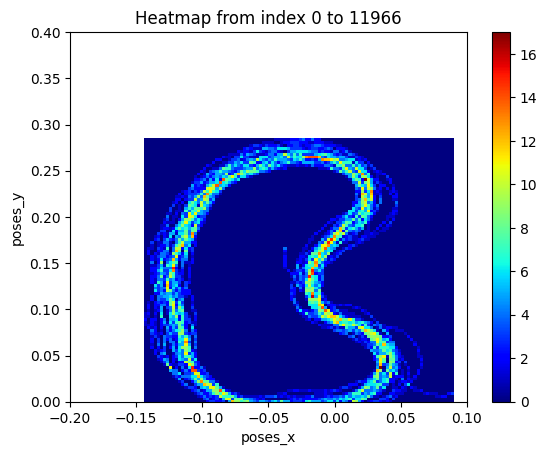

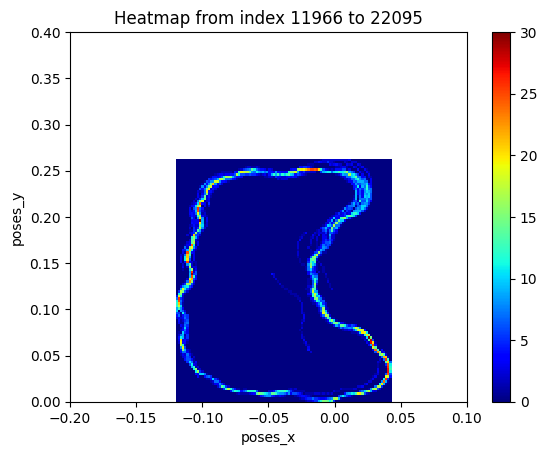

In [48]:

poses_x = root['observations']['poses_x']
poses_y = root['observations']['poses_y']
# Now, let's plot for each segment
start_idx = 0
for end_idx in change_indices:
    plot_heatmap(start_idx, end_idx)
    start_idx = end_idx

In [20]:
# print the numbers of dones 
print("Number of dones:", np.sum(root['done']))
print("Number of truncated:", np.sum(root['truncated']))

Number of dones: 1
Number of truncated: 20


In [36]:
# print distance between truncated being true
truncated = root['truncated']
truncated_indices = np.where(np.array(root['truncated']) == True)[0]

In [38]:
# print diff truncated indices
print("Diff truncated indices:", np.diff(truncated_indices))

Diff truncated indices: [500 500 500 500 500 500 500 500 500 500 500 582 500 500 500 500 500 500
 500]
